In [152]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


FILENAME = "act_bliz.csv"
Activision= pd.read_csv(FILENAME, na_values='N/A')
FILENAME = "ea.csv"
EA= pd.read_csv(FILENAME, na_values='N/A')
FILENAME = "microsoft.csv"
Microsoft= pd.read_csv(FILENAME, na_values='N/A')
FILENAME = "nintendo.csv"
Nintendo= pd.read_csv(FILENAME, na_values='N/A')

In [153]:
## Normalize numeric features:
num_features = ['Open', 'High', 'Low', 'Close', 'Volume']
scaler = StandardScaler()

def standard(company):
    company[num_features] = scaler.fit_transform(company[num_features])
    company.sort_values('Date', ascending=False, inplace=True)
    return company
standard(Activision)
standard(EA)
standard(Microsoft)
standard(Nintendo)


,Date,Open,High,Low,Close,Volume,Currency
3189,2022-09-02,0.875828,0.854689,0.865414,0.843458,-0.211758,USD
3188,2022-09-01,0.883995,0.869283,0.889020,0.874492,-0.219337,USD
3187,2022-08-31,0.931909,0.916849,0.906038,0.888103,-0.309004,USD
3186,2022-08-30,0.937898,0.916309,0.919763,0.906070,-0.173739,USD
3185,2022-08-29,0.938442,0.923336,0.945565,0.923492,-0.057381,USD
...,...,...,...,...,...,...,...
4,2010-01-08,-0.011666,-0.010149,-0.005818,0.001743,0.233659,USD
3,2010-01-07,-0.047057,-0.037176,-0.033267,-0.030924,0.190931,USD
2,2010-01-06,-0.101505,-0.088525,-0.148003,-0.089180,0.108079,USD
1,2010-01-05,-0.196788,-0.137172,-0.189726,-0.180647,-0.158296,USD


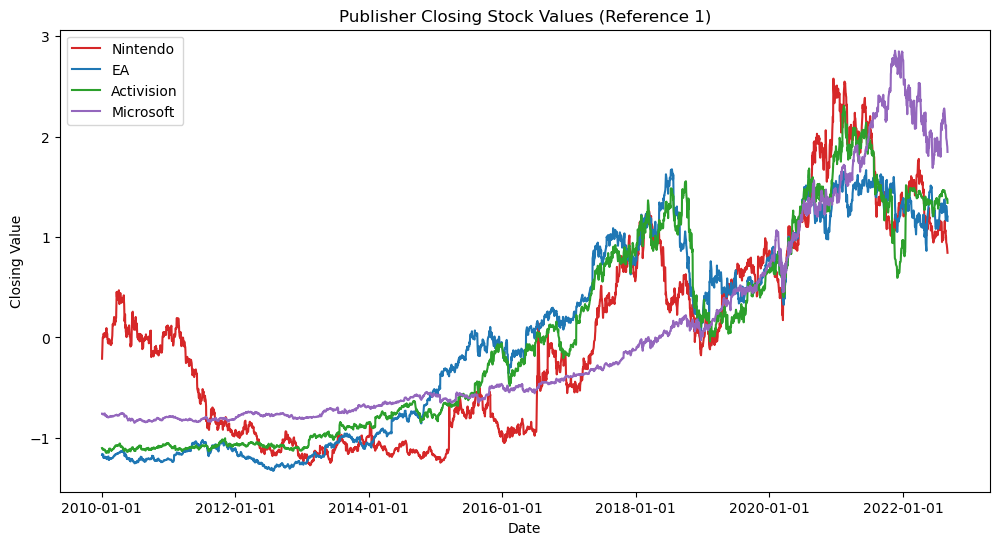

In [154]:
#Reference 1
# Convert date string to matplotlib datetime format
Nintendo['Date'] = pd.to_datetime(Nintendo['Date'])
EA['Date'] = pd.to_datetime(EA['Date'])
Activision['Date'] = pd.to_datetime(Activision['Date'])
Microsoft['Date'] = pd.to_datetime(Microsoft['Date'])

# Define x and y data
xdata1 = Nintendo['Date']
ydata1 = Nintendo['Close']
xdata2 = EA['Date']
ydata2 = EA['Close']
xdata3 = Activision['Date']
ydata3 = Activision['Close']
xdata4 = Microsoft['Date']
ydata4 = Microsoft['Close']

# Create figure and axis objects
fig, ax = plt.subplots(figsize=(12, 6))

# Plot data
ax.plot(xdata1, ydata1, color='tab:red', label='Nintendo')
ax.plot(xdata2, ydata2, color='tab:blue', label='EA')
ax.plot(xdata3, ydata3, color='tab:green', label='Activision')
ax.plot(xdata4, ydata4, color='tab:purple', label='Microsoft')

# Set x-axis formatter
date_fmt = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(date_fmt)

# Set axis labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Closing Value')
ax.set_title('Publisher Closing Stock Values (Reference 1)')

# Add legend
ax.legend()

plt.show()

Publisher Closing Stock Values (Reference 1)

Nintendo is unique out of the other major publisher as it is the only one to decreased in value from 2010 to 2012. From 2014 to 2018 Nintendo lags behind EA and Activision but eventually aligns with them generally 2018 onward. Microsoft is the only publisher that shows steady growth from 2010 to 2022, even peaking at the end of 2021, approximately a year after the other 3 publishers.

What our data cannot predict:

While there are numerous factors to consider for predicting game sales, one factor seems to be highlighed these stock trends. Console eras can have a major impact on game sales and stock values. 
The best example is Nintendo. This publsiher is unique in that all of their published games are only available on Nintendo platforms. (Reference 2)

This means thier sales are dependent on not only the game itself, but the consumer reception of their platform as well. The unique dip of Nintendo's stock from 2011 through 2016 perfectly aligns with thier release of the Wii U platform. 
This new platform was a low point in Nintendo's sales and consumer reviews for their latest console. (Reference 3)

If Nintendo's games can only be played on their consoles, and their consoles were unpopular during this time period, it only makes sense that Nintendos stock would drop unlike the trends of the other top publishers. It is unusual for a Nintendo console to be received so poorly but it shows how each console release cycle presents an unforeseen risk or opportunity for Nintendo's stock values that will also impact game sales. 

To highlight the impact of the Wii U era, the two bar graphs below take a closer look at yearly stock closing values between Microsoft and Nintendo.

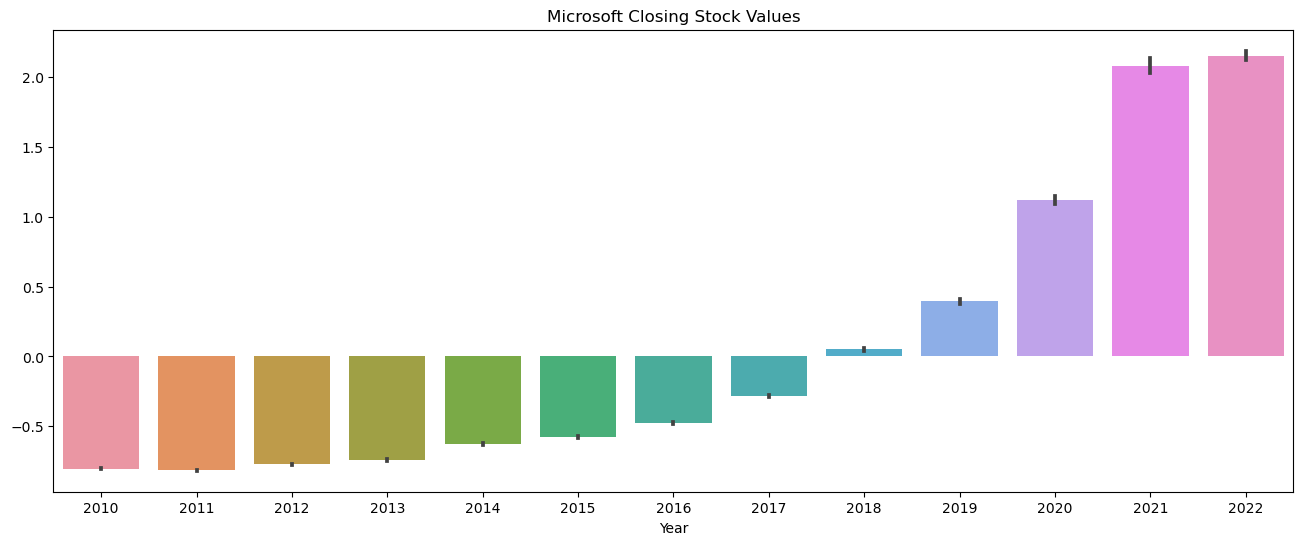

In [155]:
#Microsoft closing stock value starting in 2010 through 2022
Microsoft['Year'] = pd.to_datetime(Microsoft['Date']).dt.year

xdata1 = Microsoft['Year'].values
ydata1 = Microsoft['Close'].values
plt.figure(figsize=(16, 6))
sns.barplot(x=xdata1, y=ydata1)
plt.xlabel("Year")

ax = plt.gca()
ax.xaxis.set_major_locator(plticker.MultipleLocator(base=1))
ax.set_title('Microsoft Closing Stock Values')
plt.show()

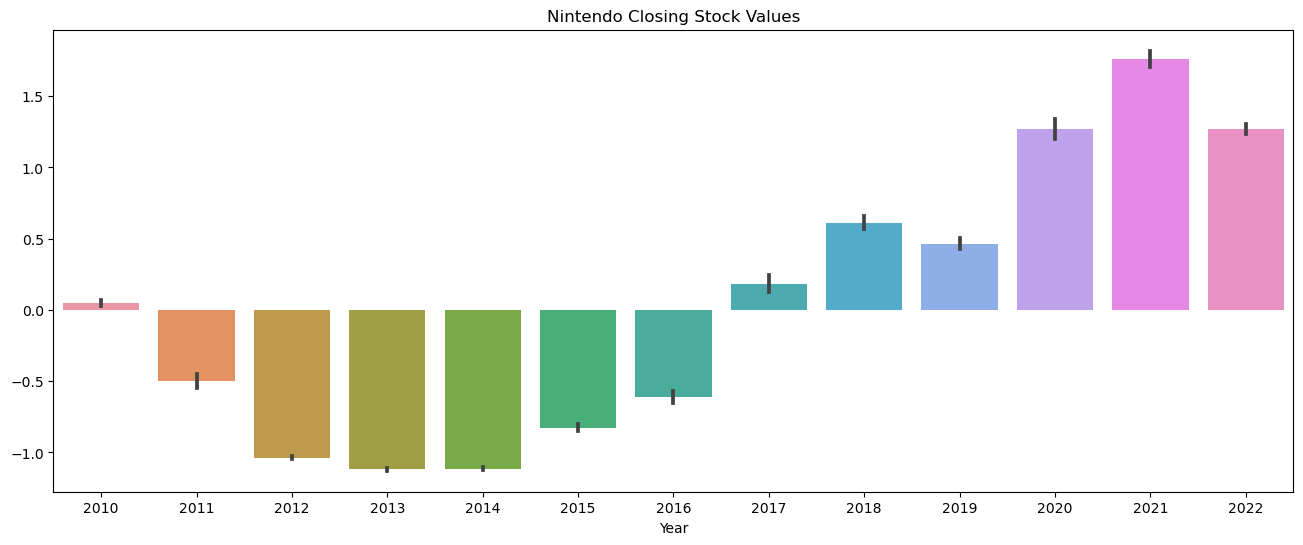

In [156]:
#Nintendos closing stock value starting in 2010 through 2022
import matplotlib.ticker as plticker
Nintendo['Year'] = pd.to_datetime(Nintendo['Date']).dt.year

xdata1 = Nintendo['Year'].values
ydata1 = Nintendo['Close'].values

plt.figure(figsize=(16, 6))
sns.barplot(x=xdata1, y=ydata1)
plt.xlabel("Year")

ax = plt.gca()
ax.xaxis.set_major_locator(plticker.MultipleLocator(base=1))
ax.set_title('Nintendo Closing Stock Values')
plt.show()

**Reference 2**

In [158]:
#top game sales data
file_path = "cleaned_vgames_data.csv" 
df = pd.read_csv(file_path)

#All consoles the top Nintendo published games are under(which are all Nintendo consoles)
df1 = df[df['Publisher'] == "Nintendo"]
df1["Platform"].value_counts()

DS      151
GBA      91
3DS      84
Wii      83
GB       61
N64      60
GC       53
NES      45
WiiU     42
SNES     36
Name: Platform, dtype: int64

**Reference 3**

Source: https://www.statista.com/statistics/227012/lifetime-unit-sales-of-nintendos-home-consoles/

(data https://www.nintendo.co.jp/ir/en/finance/historical_data/index.html)


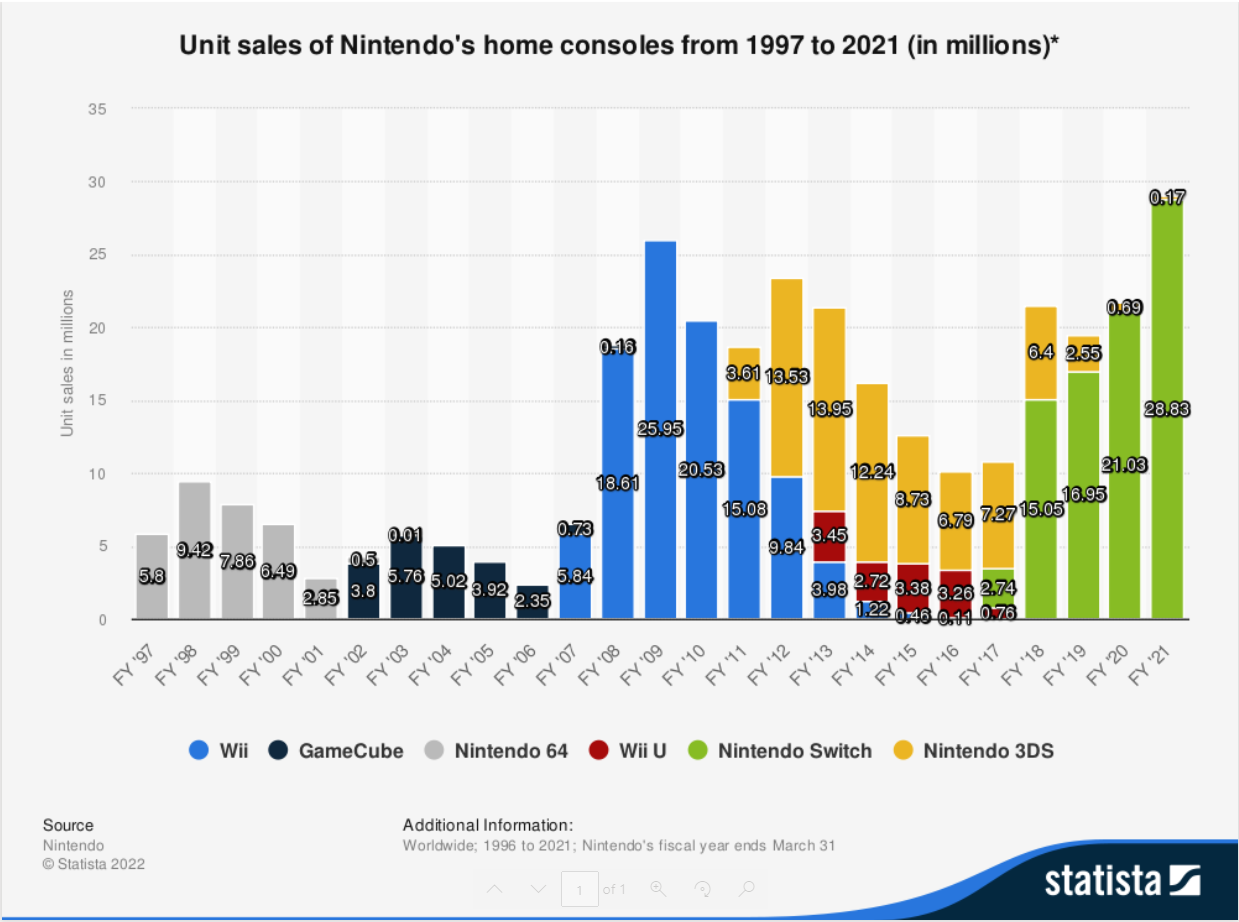